# Just-in-time compilation (JIT) in Python

*Gerbrand Koren, 8 Feb 2017*

This demo illustrates how performance of python code can be improved by using just-in-time (JIT) compilation.

Advantages of JIT:
- does not require users to explicitly perform compilation step before execution (keeping the flexibility of an interpreted languague)
- possible speed up of code by simply adding the decorator **@jit** before a heavy loop

JIT can be imported from the numba package (which is part of the Anaconda distribution). The speed up that can be achieved by using JIT is different for each code.

#### Step 1
Configuring some IPython settings and importing the necessary packages (all part of the Anaconda package)

In [1]:
# -- IPython settings
%reset -f
%matplotlib inline

# -- Import statement
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

#### Step 2
Defining test loops with and without the **@jit** decorator

In [2]:
# -- Test loop
def testloop(i_max):
    x = 0
    for i in range(i_max):
        x = x + i

# -- Test loop with JIT
@jit
def testloop_jit(i_max):
    x = 0
    for i in range(i_max):
        x = x + i

#### Step 3
Running the code and determining execution time

In [3]:
# -- Select number of function calls
j_max = 5

# -- Pre-allocation
t_best = np.zeros(j_max)
t_jit_best = np.zeros(j_max)
iterations = np.zeros(j_max)

for j in range(j_max):
    
    # -- Call testloops and record time
    t = %timeit -o -q testloop(10**j)
    t_jit = %timeit -o -q testloop_jit(10**j)
       
    # -- Save execution time
    t_best[j] = t.best
    t_jit_best[j] = t_jit.best
    
    # -- Save iterations
    iterations[j] = 10**j

#### Step 4
Showing results

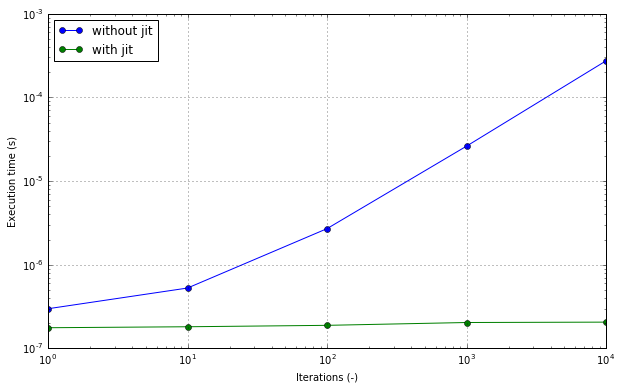

In [4]:
# -- Plot figure
plt.figure(figsize=[10,6])
plt.loglog(iterations,t_best,'o-',label='without jit')
plt.loglog(iterations,t_jit_best,'o-',label='with jit')
plt.legend(loc=2)
plt.grid(True)
plt.ylabel('Execution time (s)')
plt.xlabel('Iterations (-)')
plt.show()